<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [26]:
import pandas as pd
import psycopg2
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
connection = psycopg2.connect(
   dbname='project_sql',
   user='skillfactory',
   host='84.201.134.129',
   password='cCkxxLVrDE8EbvjueeMedPKt',
   port=5432
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [5]:
# текст запроса
query_3_1 = f'''select count(id) as qnty from public.VACANCIES
'''

In [6]:
df = pd.read_sql_query(query_3_1, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,qnty
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [9]:
# текст запроса
query_3_2 = f'select count(id) from public.EMPLOYERS'

In [10]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [11]:
# текст запроса
query_3_3 = f'select count(id) from public.AREAS'

In [13]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [14]:
# текст запроса
query_3_4 = f'select count(id) from public.INDUSTRIES'

In [15]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,294


***

## Выводы
База данных содержит информацию о 49197 вакансиях от 23501 работадателей и охватывает 1362 города среди 294 различных сфер деятельности. 

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [16]:
# текст запроса
n=1
k=5
query_4_1 = f'''
select count(v.id) cnt, 
a.name area
from public.VACANCIES v
join public.AREAS a on v.area_id = a.id
group by a.name
order by {n} desc
limit {k}'''

In [19]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [20]:
# текст запроса
query_4_2 = f'''
select count(*) cnt
from public.VACANCIES 
where salary_from is not null or salary_to is not null
'''

In [21]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [22]:
# текст запроса
query_4_3 = f'''
select avg(salary_from) s_from,
avg(salary_to) s_to
from public.VACANCIES 
'''

In [23]:
# результат запроса
df = round(pd.read_sql_query(query_4_3, connection))
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,s_from,s_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [28]:
# текст запроса
n=10
query_4_4 = f'''
select schedule sch,
employment emp,
count(id) cnt
from public.VACANCIES
group by sch, emp
order by cnt desc
limit {n}
'''

In [29]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,sch,emp,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [26]:
# текст запроса
query_4_5 = f'''
select experience,
count(id) cnt
from public.VACANCIES
group by experience
order by cnt
'''

In [27]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

## Выводы
Наибольшее количество вакансий находится в крупных городах, таких как Москва, Санкт-Петербург, Минск, Новосибирск, Алматы.
Практически у половины из указанных вакансий (49%) заполнено хотя бы одно из полей с размером зарплаты (нижняя или верхняя ее граница).
Среднее значение для нижней границы зарплатной вилки составляет 71065 руб. для верхней границы среднее значение - 110537 руб.
Наиболее популярным сочетанием рабочего графика и типа трудоустройства является вариант Полный день	и Полная занятость; вторым по популярности с большим отрывом идет вариант Удаленная работа и Полная занятость.
Наиболее восстребованы кандидаты с опытом работы от 1 года до 3 лет, далее от 3 до 6 лет и самым непопулярным, что довольно странно, оказался вариант более 6 лет. 

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [30]:
# текст запроса
n=1
k=5
query_5_1 = f'''
select count(v.id) cnt, 
e.name
from public.VACANCIES v
join public.EMPLOYERS e on v.employer_id = e.id
group by e.name
order by {n} desc
limit {k}'''

In [31]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt,name
0,1933,Яндекс
1,491,Ростелеком
2,444,Тинькофф
3,428,СБЕР
4,331,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [32]:
# текст запроса
query_5_2 = f'''
select count(e.id) emp,
a.name
from public.AREAS a
left join public.VACANCIES v on a.id = v.area_id
left join public.EMPLOYERS e on a.id = e.area
group by a.name
having count(v.id) = 0
order by emp desc
limit 1
'''

In [36]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

,emp,name
0,410,Россия


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [37]:
# текст запроса
n=1
query_5_3 = f'''
select count(distinct v.area_id) cnt,
e.name
from public.VACANCIES v 
join public.EMPLOYERS e on v.employer_id = e.id
group by e.name
order by cnt desc
limit {n}
'''

In [38]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt,name
0,181,Яндекс


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [39]:
# текст запроса
query_5_4 = f'''
select count(e.id) cnt
from public.INDUSTRIES i
right join public.EMPLOYERS_INDUSTRIES ei on i.id = ei.industry_id
right join public.EMPLOYERS e on e.id = ei.employer_id
where i.name is null
'''

In [42]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

,cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [43]:
# текст запроса
m=4
n=1
c=2
query_5_5 = f'''
select e.name,
count(i.id) cnt
from public.INDUSTRIES i
right join public.EMPLOYERS_INDUSTRIES ei on i.id = ei.industry_id
right join public.EMPLOYERS e on e.id = ei.employer_id
group by e.name
having count(i.id) = {m}
order by {n}
offset {c}
limit {n}
'''

In [44]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [45]:
# текст запроса
query_5_6 = f'''
select count(e.id) cnt
from public.INDUSTRIES i
right join public.EMPLOYERS_INDUSTRIES ei on i.id = ei.industry_id
right join public.EMPLOYERS e on e.id = ei.employer_id
where i.name = 'Разработка программного обеспечения'
'''

In [46]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [28]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' # Задаём адрес ресурса
response = requests.get(url) # Делаем GET-запрос к ресурсу
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup
links = page.find_all('a')
cities = tuple([link.text for link in links[45:62]])

In [50]:
# текст запроса
d=2
query_5_7 = f'''
(select distinct a.name,
count(v.id)
from public.VACANCIES v
join public.EMPLOYERS e on v.employer_id = e.id
join public.AREAS a on v.area_id = a.id
where e.name = 'Яндекс' and a.name in {cities}
group by a.name)

UNION ALL

(select 'Total',
count(v.id)
from public.VACANCIES v
join public.EMPLOYERS e on v.employer_id = e.id
join public.AREAS a on v.area_id = a.id
where e.name = 'Яндекс' and a.name in {cities})
order by {d}
'''

In [53]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

,name,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

## Выводы
Среди самых крупных работодателей преобладают крупные частные и государственные компании (топ 5: Яндекс, Ростелеком, Тинькофф, Сбер, Газпром нефть). Первые четыре компании являются лидерами на рынке IT технологий.
География регионов, в которых представлены вакансии наиболее крупных работодателей, охватывает практически всю Россию. Например, Яндекс, крупнейший работодатель в РФ, представлен в 181 регионе РФ; из 1933 вакансий 485 находятся в городах-миллионниках или всего 25%, что, на мой взгляд, немного, учитывая, что большая часть вакансий обычно концентрируется в крупных городах. В сфере разработки програмного обеспечения 3553 вакансий, что составляет 7,2% от всех вакансий на рынке труда. 

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [3]:
# текст запроса
query_6_1 = f'''
select count(id) cnt
from public.VACANCIES
WHERE lower(name) LIKE '%данн%' OR lower(name) LIKE '%data%'
'''

In [4]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [5]:
# текст запроса
query_6_2 = f'''
select count(*) cnt
from public.VACANCIES
WHERE (name ilike '%data scientist%'
OR name ilike '%data science%'
OR name ilike '%исследователь данных%'
OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
OR name ilike '%machine learning%'
OR name ilike '%машинн%обучен%')
AND (name ilike '%Junior%' OR experience ilike '%Нет опыта%' OR employment ilike '%Стажировка%')
'''

In [6]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [7]:
# текст запроса
query_6_3 = f'''
select count(*) cnt
from public.VACANCIES
WHERE (name ilike '%data scientist%'
OR name ilike '%data science%'
OR name ilike '%исследователь данных%'
OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
OR name ilike '%machine learning%'
OR name ilike '%машинн%обучен%')
AND (key_skills ilike '%SQL%' OR key_skills ilike '%postgres%')
'''

In [8]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [13]:
# текст запроса
query_6_4 = f'''
select count(*) cnt
from public.VACANCIES
WHERE (name ilike '%data scientist%'
OR name ilike '%data science%'
OR name ilike '%исследователь данных%'
OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
OR name ilike '%machine learning%'
OR name ilike '%машинн%обучен%')
AND (key_skills ilike '%Python%')
'''

In [14]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

,cnt
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [15]:
# текст запроса
query_6_5 = f'''
select 
round(AVG(length(key_skills) - length(replace(key_skills, '\t', ''))+1),2) av_len
from public.VACANCIES
WHERE (name ilike '%data scientist%'
OR name ilike '%data science%'
OR name ilike '%исследователь данных%'
OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
OR name ilike '%machine learning%'
OR name ilike '%машинн%обучен%')
'''

In [18]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,av_len
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [21]:
# текст запроса
query_6_6 = f'''
select experience,
ROUND(AVG(COALESCE((salary_to + salary_from)/2, salary_to, salary_from))) av_sal
from public.VACANCIES
WHERE(name ilike '%data scientist%'
OR name ilike '%data science%'
OR name ilike '%исследователь данных%'
OR (name LIKE '%ML%' AND name NOT LIKE '%HTML%')
OR name ilike '%machine learning%'
OR name ilike '%машинн%обучен%')
AND (salary_from is not null OR salary_to is not null)
group by experience
'''

In [24]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df[df['experience']=='От 3 до 6 лет']['av_sal']

c:\Users\Dmitriy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2    243115.0
Name: av_sal, dtype: float64

***

## Вывод
Основная цель Юнита 6 - сориентировать начинающего дата сайнтиста в том, какие вакансии, с какими навыками, зарплатами, в каких городах и у каких работодателей есть в базе данных HH. Мы видим, что 1771 (3,6% от общего кол-ва) вакансия так или иначе связана с работой с данными. Из них для 201 вакансии ключевым навыком является знание SQL, а еще для 351 - Python. И всего 51 вакансия для специалистов начального уровня, без опыта или в качестве стажеровки. Получается, что выбор совсем не велик. Однако, мне кажется, что такой небольшой свиду спрос на специалистов DS связан с тем, что хорошие DS-ты могут работать на фрилансе, заниматься проектной работой или привлекаться к работе в "команде". Также в целом рынок IT специалистов выходит далеко за рамки России и СНГ и распространяется на весь мир и, возможно, лучшим решением для поиска работы было бы использования международнвх соцсетей, как LinkedIn или тот же GitHub. Однако первые представления об уровне спроса и соответствующей оплате труда можно получить из этой базы. 

# Дополнительные исследования

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_15908\3961534140.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


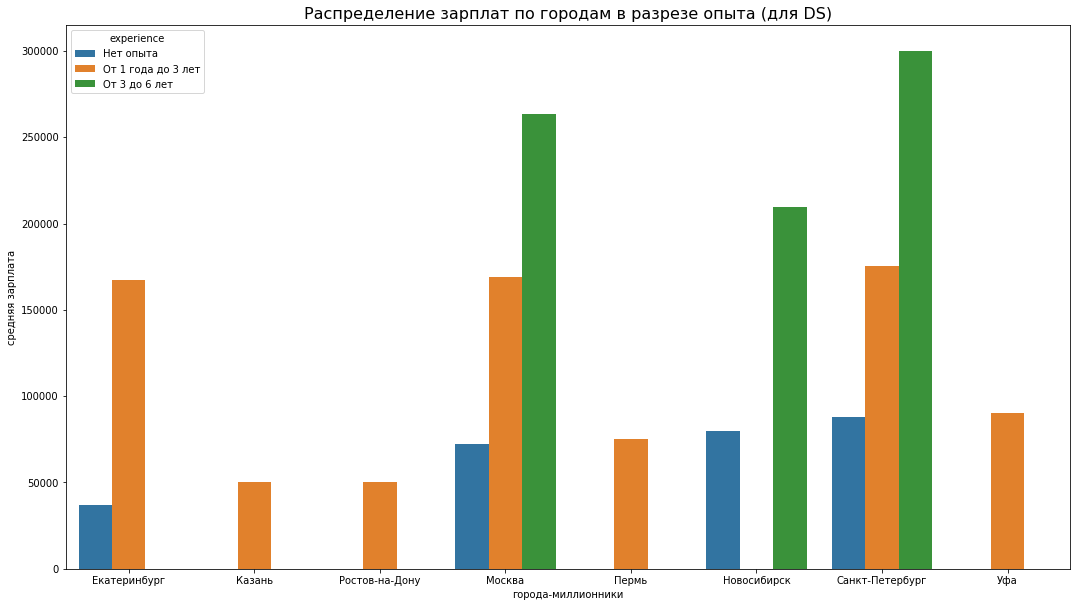

In [31]:
l = 3
query_extra = f'''
select distinct a.name,
v.experience,
ROUND(AVG(COALESCE((salary_to + salary_from)/2, salary_to, salary_from))) av_salary
from public.VACANCIES v
join public.EMPLOYERS e on v.employer_id = e.id
join public.AREAS a on v.area_id = a.id
WHERE(v.name ilike '%data scientist%'
OR v.name ilike '%data science%'
OR v.name ilike '%исследователь данных%'
OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%')
OR v.name ilike '%machine learning%'
OR v.name ilike '%машинн%обучен%')
AND (v.salary_from is not null OR v.salary_to is not null)
AND a.name in {cities}
group by a.name, v.experience
order by {l}
'''

df1 = pd.read_sql_query(query_extra, connection)

fig = plt.figure(figsize=(18, 10))
ax = sns.barplot(data=df1, x="name", y="av_salary", hue="experience")
ax.set_title("Распределение зарплат по городам в разрезе опыта (для DS)", fontsize=16)
plt.legend(loc='upper left', title='experience')
plt.xlabel('города-миллионники', fontsize=10)
plt.ylabel('средняя зарплата', fontsize=10)

fig.show() 

## Вывод 
Цель дополнительного исследования - определить в каких крупных городах можно найти работу DS-ту и наглядно увидеть уровень соответсвующей зарплаты в зависимости от его опыта. Я воспользовался ранее сделанным фильтром по городам-милионникам и построил распределение средних зарплат по ним в зависимости от опыта. Запрос показывает (см. график), например, что только в четырех городах требуются специалисты без опыта (Екатеринбург, Москва, Новосибирск и Санкт-Петербург). Почти во всех городах, попавших в выборку, нужны специалисты с небольшим опытом (от 1 года до 3 лет) кроме Новосибирска. И только в трех городах можно найти работу опытным специалистам. Также наглядно видна разница в зарплатах в зависимости от опыта. Из этого запроса можно сделать вывод, что наиболее перспективным местом для начала карьеры можно рассмотреть Санкт-Петербург, как город с самым стабильным спросом на DS специалистов и наиболее щедрой оплатой труда. 

# Общий вывод по проекту
Что понравилось:
В проекте хорошо проработана практическая часть, связанная с объединением нескольких таблиц. Необходимо самому правильно подобрать ключи, по которым объединяются таблицы. В заданиях отлично продемонстрированы возможности использования различных фильтров по ключевым словам, а также есть задание на получение данных из веб-источника. 
Что не понравилось:
Не понятно почему в решении задач используются методы, которые никак не были освещены на курсе. К примеру, менторы предлагают импользовать для фильтрации оператор ilike, а не комбинацию like+lower, хотя в курсе про этот опреатор, который явно удобней, так как игнорирует регистр, ничего не рассказано. Также в Задании 6_5 в "подсказке" объясняется как посчитать длину строки, но я, например, принципиально не хотел пользоваться подсказкой пока окончательно не зашел в тупик, потому что пытался решить задачу только известными мне ранее методами. В итоге потерял много времени и сил. 
Что касается самих данных, то некоторые цифры меня удивили (частично я уже отметил это в промежуточных выводах). Например, это очень небольшое количество вакансий, связанных с обработкой данных (1771 вакансия, и это не только Россия, но и СНГ). Также очень маленькое количество вакансий для профильных DS специалистов. Еще для меня стало открытием то, что наиболее восстребованны специалисты с опытом работы от 3 до 6 лет, а далее идут специалисты без опыта. Кроме этого, после двух ковидных лет "удаленка" должна была стать более восстребована у соискателей и не так сильно раздражать работодателей, особоенно в IT сфере. Но мы видим, что такой тип рабочего графика хоть и занимает вторую по популярности строчку, однако все равно имеет очень значительный отрыв от стандартного графика. Возможно, данные в базе слегка устарели и неучитывают тенденции последних лет, особенно массовый отъезд IT-шников за последний год. 
В целом после окончания проекта я чувствую, определенную уверенность, что могу получать данные, анализировать и строить прогнозы.